In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [20]:
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image


In [21]:
def quantize_image(image, levels):
    """
    Reduces the number of grayscale levels.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image


In [22]:
def plot_images(original, sampled, quantized):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')

    plt.show()


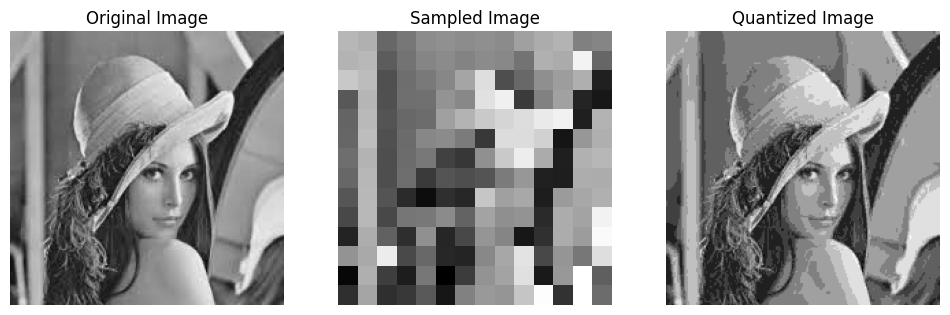

In [23]:
image_path = 'images/lena_gray_256.tif'
sampling_factor = 14
quantization_levels = 9

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print(f"Error: Unable to load image at {image_path}")

sampled_image = sample_image(original_image, sampling_factor)
quantized_image = quantize_image(original_image, quantization_levels)

plot_images(original_image, sampled_image, quantized_image)


In [24]:
img1 = Image.open('images/lena_gray_256.tif')
img2 = Image.open('images/cameraman.tif')

resize = (400, 400)
img1 = img1.resize(resize, Image.Resampling.LANCZOS)
img2 = img2.resize(resize, Image.Resampling.LANCZOS)

im1arr = np.asarray(img1)
im2arr = np.asarray(img2)

addition = im1arr + im2arr
resultImage = Image.fromarray(addition)
resultImage.show()


In [25]:
img3 = Image.open('images/A.png')
img4 = Image.open('images/B.png')

resize = (400, 400)
img3 = img3.resize(resize, Image.Resampling.LANCZOS)
img4 = img4.resize(resize, Image.Resampling.LANCZOS)

im3arr = np.asarray(img3)
im4arr = np.asarray(img4)

union = im4arr | im3arr
resultImage2 = Image.fromarray(union)
resultImage2.show()
